                        ### OASIS INFOBYTE ###       
        ### DATA SCIENCE INTERN ###   ### FEBRUARY 2023 ###
    ### MRIDUL KAPOOR ###       ### mridul.kapoor2002@gmail.com ###
            ### TASK-4 ###      ### EMAIL SPAM DETECTION ###

In [1]:
#IMPORT MODULES AND LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [2]:
#LOAD DATASET
raw_mail_data = pd.read_csv("C:\\Users\\Mridul_Work\\Desktop\\OasisInfobyte_DataScience\\Task4_EmailSpamDetection\\spam.csv",encoding="latin1")
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [3]:
#PRINT DATASET
print("MAIL  DATASET".center(0))
print(mail_data)

print("\nDATASET INFO".center(0))
mail_data.info()

print("\nDATASET DESCRIBED".center(0))
mail_data.describe()

MAIL  DATASET
        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...              
1      ham                      Ok lar... Joking wif u oni...              
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...              
3      ham  U dun say so early hor... U c already then say...              
4      ham  Nah I don't think he goes to usf, he lives aro...              
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...              
5568   ham              Will Ì_ b going to esplanade fr home?              
5569   ham  Pity, * was in mood for that. So...any other s...              
5570   ham  The guy did some bitching but I acted like i'd...              
5571   ham                         Rofl. Its true to its name              

     Unnamed: 3 Unnamed: 4  
0                           
1              

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,5572,5572,5572
unique,2,5169,44,11,6
top,ham,"Sorry, I'll call later",,,
freq,4825,30,5522,5560,5566


    #MODEL FORMATION


In [4]:
#label spam -> 0 and ham -> 1
mail_data.loc[mail_data['v1']=='spam', 'v1',] = 0
mail_data.loc[mail_data['v1']=='ham', 'v1',] = 1

In [5]:
values = mail_data.values
x = mail_data['v2']
y = mail_data['v1']
print("X-AXIS VALUES","\n",x)
print("\nY-AXIS VALUES","\n",y)

X-AXIS VALUES 
 0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

Y-AXIS VALUES 
 0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object


In [6]:
#SPILITTING DATA INTO TRAINING AND TEST SET
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

#convert the text to lower case letter
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

y_train = y_train.astype("int")
y_test = y_test.astype("int")

print("TRAINING SET FROM X-AXIS\n",x_train)
print("\nTRAINING SET FROM Y-AXIS\n",y_train)
print("\nTEST SET FROM X-AXIS\n",x_test)
print("\nTEST SET FROM Y-AXIS\n",y_test)

TRAINING SET FROM X-AXIS
 1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: v2, Length: 4457, dtype: object

TRAINING SET FROM Y-AXIS
 1114    1
3589    1
3095    1
1012    1
3320    1
       ..
4931    1
3264    0
1653    1
2607    1
2732    1
Name: v1, Length: 4457, dtype: int32

TEST SET FROM X-AXIS
 4456    Aight should I just plan to come up later toni...
690                                    Was 

In [7]:
from sklearn.svm import SVC
svc_model = LinearSVC()
svc_model.fit(x_train_features, y_train)

LinearSVC()

In [8]:
#VISUALIZATION OF DATASET
x = mail_data['v2']
y = mail_data['v1']
print("X-AXIS","\n",x)
print("\nY-AXIS","\n",y)

X-AXIS 
 0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

Y-AXIS 
 0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object



COUNT PLOT


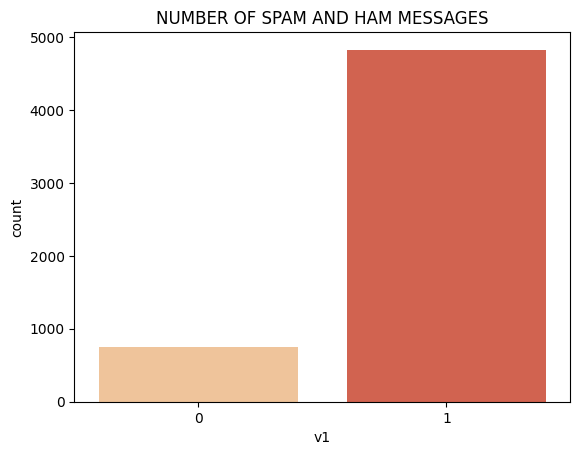


PIE CHART


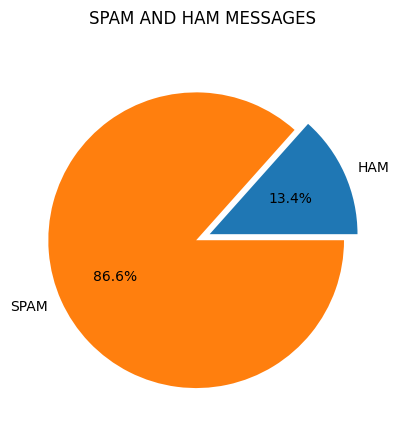

In [9]:
print("\nCOUNT PLOT")

sns.countplot(x=mail_data["v1"], data=mail_data, palette="OrRd")

plt.title("NUMBER OF SPAM AND HAM MESSAGES")
plt.grid(False)
plt.show()

print("\nPIE CHART")

count_Class=pd.value_counts(mail_data.v1, sort= True)
plt.title("SPAM AND HAM MESSAGES\n")
labels = 'HAM', 'SPAM'
sizes = [count_Class[0], count_Class[1]]
explode = (0.05, 0.05)

plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
plt.show()

In [10]:
#EVALUATION OF MODEL
#prediction of training data
prediction_on_training_data = svc_model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print("Accuracy on training data: ", accuracy_on_training_data*100)

Accuracy on training data:  100.0


In [11]:
#prediction on test data
prediction_on_test_data = svc_model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print("Accuracy on test data: ", accuracy_on_test_data*100)

Accuracy on test data:  98.38565022421525


END